In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50504_G')

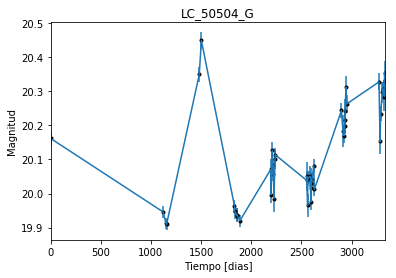

In [2]:
data = np.genfromtxt('LC_50504_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50504_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

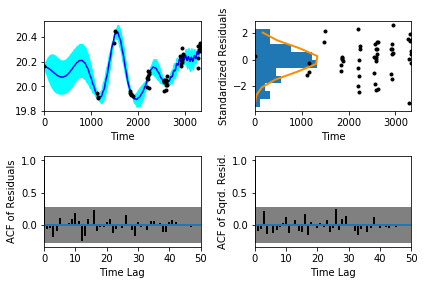

In [5]:
sample.assess_fit()

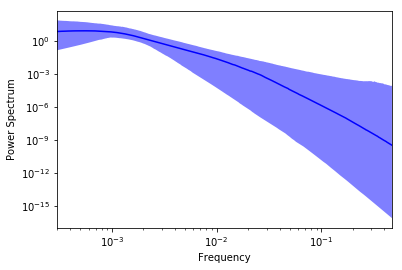

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50504_G')

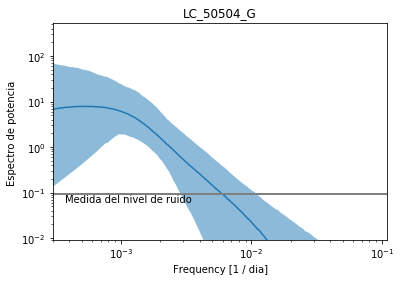

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50504_G')

Text(0.5,1,'Prediccion , valor esperado LC_50504_G')

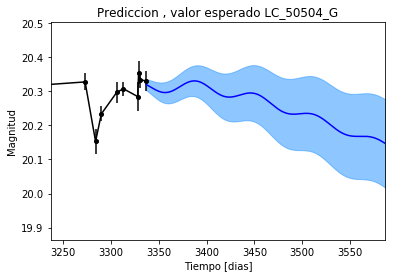

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50504_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50504_G')

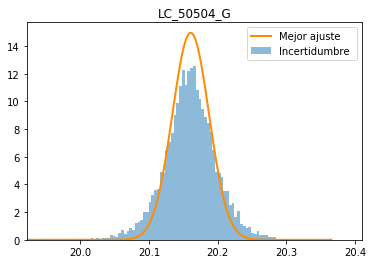

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50504_G')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_G')

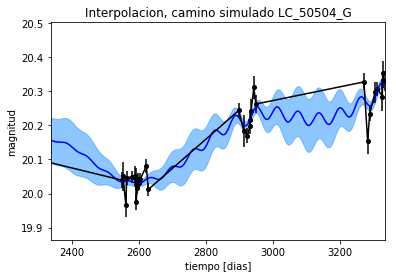

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_G')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_G')

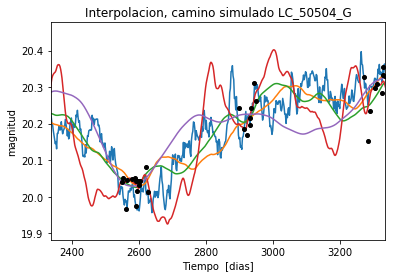

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 607.442224726
Median: 0.0114934124961
Standard deviation: 0.167989927522
68% credibility interval: [ 0.00064019  0.15459563]
95% credibility interval: [  3.37814214e-04   6.80418032e-01]
99% credibility interval: [  3.05288161e-04   8.60866041e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 242.456092622
Median: 0.00250879199004
Standard deviation: 0.120483923224
68% credibility interval: [ 0.00047566  0.06804527]
95% credibility interval: [  3.26357290e-04   4.49957730e-01]
99% credibility interval: [  3.02629067e-04   8.25811651e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 353.301716607
Median: 0.0043856862535


In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 480.828353976
Median: 91.563931227
Standard deviation: 1.74622222923
68% credibility interval: [ 89.70534575  92.9854338 ]
95% credibility interval: [ 87.17651906  93.99415254]
99% credibility interval: [ 85.28805797  94.73234522]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 257.229380885
Median: 0.554828761293
Standard deviation: 2.02240064712
68% credibility interval: [ 0.05279959  3.29876574]
95% credibility interval: [ 0.01355663  6.96493697]
99% credibility interval: [  9.42861247e-03   1.04811355e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 406.665473646
Median: 0.298258874578
Standard deviation: 8.44703953429
68% credibility interval: [ 0.01063644  9.11753389]
95% credibility interval: [  3.2

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5012.59632423
Median: 5.7244742324
Standard deviation: 5.11436980645e+69
68% credibility interval: [  5.29452077e-29   2.28716296e+34]
95% credibility interval: [  1.38728085e-74   1.29417979e+53]
99% credibility interval: [  2.12099633e-91   2.01647391e+57]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2560.37349553
Median: 20.1326070634
Standard deviation: 0.0713659451799
68% credibility interval: [ 20.08730949  20.18903528]
95% credibility interval: [ 19.99194296  20.28711134]
99% credibility interval: [ 19.89437855  20.40449743]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 560.811364396
Median: 0.0191930152995
Standard deviation: 0.23515649152
68% credibility interval: [ 0.          0.40920914]
95% credibility interval: [ 0.         0.8122449]
99% credibility interval: [ 0.          0.90244282]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 560.811364396
Median: 0.0191930152995
Standard deviation: 0.23515649152
68% credibility interval: [ 0.          0.40920914]
95% credibility interval: [ 0.         0.8122449]
99% credibility interval: [ 0.          0.90244282]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 486.760151123
Median: 0.0
Standard deviation: 0.00052326638995
68% credibili

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 480.828353976
Median: 91.563931227
Standard deviation: 1.74622222923
68% credibility interval: [ 89.70534575  92.9854338 ]
95% credibility interval: [ 87.17651906  93.99415254]
99% credibility interval: [ 85.28805797  94.73234522]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2177.91717369
Median: 0.0274497617563
Standard deviation: 0.0353691985045
68% credibility interval: [ 0.01646609  0.05450851]
95% credibility interval: [ 0.011512   0.1209981]
99% credibility interval: [ 0.00958881  0.23491211]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 438.45281556
Median: 1.31976548297
Standard deviation: 0.263715121485
68% credibility interval: [ 1.05403587  1.60747531]
95% credibility interval: [ 0.84606319  1.86403728]
99% credibility interval: [ 0.7771175   1.96378937]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 804.575532252
Median: 1.10905947522e-06
Standard deviation: 0.0782695246194
68% credibility interval: [  2.70062083e-38   1.66161608e-03]
95% credibility interval: [  5.24828330e-57   6.19856765e-02]
99% credibility interval: [  2.24687601e-62   2.98852727e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 607.442224726
Median: (-0.0722152405248-0.311423643631j)
Standard deviation: 1.81582089157
68% credibility interval: [-0.97135301-0.72129288j -0.00402240-0.0084263j ]
95% credibility interval: [ -4.27519258e+00+0.j          -2.12254931e-03-0.00131966j]
99% credibility interval: [ -5.40898086e+00-3.98207696j  -1.91818209e-03-1.01427564j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 242.456092622
Median: (-0.0157632049706+0.743797027843j)
Standard deviation: 1.66017583432
68% credibility interval: [-0.42754102+0.15360017j -0.00298866+0.62601069j]
95% credibility interval: [ -2.82716780e+00+2.7939423j  -2.05056333e-03+0.j       ]
99% credibility interval: [ -5.18872763e+00+5.16673708j  -1.90147451e-03+0.j        ]
Post